In [ ]:
# Model Fully Connected Neural Network untuk persoalan regresi menggunakan dataset Boston Housing Price
# Urutan proses:
# Step 1 - Memanggil library yang diperlukan
# Step 2 - Memanggil dataset
# Step 3 - Melihat isi sample dataset
# Step 4 - Preprocessing dataset
# Step 5 - Membangun model regresi
# Step 6 - Kompile dan training model
# Step 7 - Menampilkan plot training history
# Step 8 - Evaluasi pada dataset

In [1]:
# Step 1 - Memanggil library yang diperlukan
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from keras import models, layers
from matplotlib import pyplot

In [2]:
# Step 2 - Memanggil dataset
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
# Step 3 - Melihat isi sample dataset
print(X_train[0], y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


In [4]:
# Step 4 - Preprocessing dataset
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit scaler pada training set
scaler.fit(X_train)
# transformasi ke training dan testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# menampilkan sampel output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [5]:
# Step 5 - Pembuatan model regresi
#from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))
# output layer
model.add(layers.Dense(1))

In [6]:
# Step 6 - Kompile dan training model
model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
11/11 [==============================] - 2s 26ms/step - loss: 575.2055 - mae: 22.1698 - val_loss: 641.5590 - val_mae: 23.5485
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 563.5073 - mae: 21.8885 - val_loss: 631.7032 - val_mae: 23.3127
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 553.5801 - mae: 21.6375 - val_loss: 622.5781 - val_mae: 23.0960
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 543.7043 - mae: 21.3916 - val_loss: 611.9388 - val_mae: 22.8405
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 532.6697 - mae: 21.1114 - val_loss: 601.0576 - val_mae: 22.5782
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 521.4499 - mae: 20.8179 - val_loss: 590.7007 - val_mae: 22.3134
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 510.2081 - mae: 20.5161 - val_loss: 578.9272 - val_mae: 22.0131
Epoch 8/100
11/11 [=====================

11/11 [==============================] - 0s 8ms/step - loss: 30.4551 - mae: 3.7969 - val_loss: 37.2942 - val_mae: 4.1956
Epoch 62/100
11/11 [==============================] - 0s 7ms/step - loss: 29.6155 - mae: 3.7422 - val_loss: 35.8659 - val_mae: 4.1579
Epoch 63/100
11/11 [==============================] - 0s 7ms/step - loss: 28.8709 - mae: 3.6960 - val_loss: 34.7131 - val_mae: 4.1043
Epoch 64/100
11/11 [==============================] - 0s 7ms/step - loss: 28.1464 - mae: 3.6496 - val_loss: 33.6423 - val_mae: 4.0559
Epoch 65/100
11/11 [==============================] - 0s 7ms/step - loss: 27.4687 - mae: 3.6172 - val_loss: 32.6411 - val_mae: 3.9600
Epoch 66/100
11/11 [==============================] - 0s 7ms/step - loss: 26.8887 - mae: 3.5705 - val_loss: 31.5609 - val_mae: 3.9057
Epoch 67/100
11/11 [==============================] - 0s 7ms/step - loss: 26.3397 - mae: 3.5432 - val_loss: 30.6697 - val_mae: 3.8769
Epoch 68/100
11/11 [==============================] - 0s 7ms/step - loss: 2

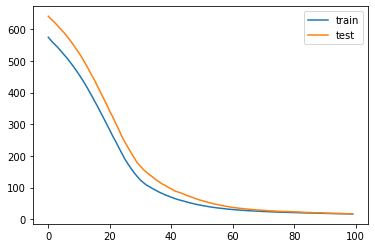

In [7]:
# Step 7 - Menampilkan plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [8]:
# Step 8 - Evaluasi pada dataset
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 24.8255 - mae: 3.6530


[24.825483322143555, 3.6530301570892334]

In [11]:
# Step 9 - Melakukan prediksi
to_predict = X_train_scaled[:10]  # sampel data (10 input pertama dari training data)
predictions = model.predict(to_predict)  # memanggil predict method
print(predictions)  # mencetak nilai prediksi
print(y_train[:10])  # mencetak nilai sesungguhnya

[[15.355974]
 [40.6468  ]
 [26.896511]
 [21.950726]
 [19.790218]
 [18.528961]
 [15.24832 ]
 [13.126206]
 [12.195814]
 [17.30174 ]]
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
